# Import

In [1]:
import sys

root_dir = '../../'
if root_dir not in sys.path:
    sys.path.append(root_dir)

import torch
from torch import nn, optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

from modules import losses, models, samplers, regularizers, evaluators, trainers, datasets, distributions

# DataSet

In [2]:
dataset = datasets.ML20m()
n_user = dataset.n_user
n_item = dataset.n_item
train_set, test_set = dataset.get_train_and_test_set()

# device setting
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
train_set = torch.LongTensor(train_set).to(device)
test_set = torch.LongTensor(test_set).to(device)

# Evaluator

In [3]:
ks = [5, 10, 50]
recall = evaluators.RecallEvaluator(test_set, ks)

# Sampler

In [4]:
sampler = samplers.BaseSampler(train_set, n_user, n_item, device=device, strict_negative=False)

# Params

In [5]:
# Hyperparameters
lr = 1e-3
n_dim = 10
n_batch = 256
n_epoch = 50
valid_per_epoch = 50
dist = distributions.Gamma()
no_progressbar = True

# Both

In [6]:
n_both_samples = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

re_1_1 = []
for n_sample in n_both_samples:
    print(f'n_item_sample={n_sample}')
    print(f'n_user_sample={n_sample}')
    model = models.MutualProximityCML(
        n_user, n_item, dist, n_dim,
        n_item_sample=n_sample,
        n_user_sample=n_sample
    ).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = losses.SumTripletLoss(margin=1).to(device)
    trainer = trainers.BaseTrainer(model, optimizer, criterion, sampler, no_progressbar)
    trainer.fit(n_batch, n_epoch, recall, valid_per_epoch)
    display(trainer.valid_scores)
    # k=10を追加
    re_1_1.append(trainer.valid_scores.iloc[-1, 1])

n_item_sample=10
n_user_sample=10


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.063260,0.126743,0.522247,0,NaN
0,0.037874,0.109503,0.756233,50,0.318884


n_item_sample=20
n_user_sample=20


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.062665,0.126604,0.521800,0,NaN
0,0.029611,0.095304,0.771969,50,0.319216


n_item_sample=30
n_user_sample=30


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.063601,0.126846,0.522304,0,NaN
0,0.026290,0.089331,0.778163,50,0.318538


n_item_sample=40
n_user_sample=40


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.063744,0.126956,0.522554,0,NaN
0,0.024551,0.085222,0.782043,50,0.317737


n_item_sample=50
n_user_sample=50


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.062988,0.126639,0.521971,0,NaN
0,0.023518,0.082411,0.783923,50,0.319554


n_item_sample=60
n_user_sample=60


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.062973,0.126583,0.522233,0,NaN
0,0.022838,0.080729,0.785723,50,0.322011


n_item_sample=70
n_user_sample=70


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.063058,0.126222,0.522317,0,NaN
0,0.022160,0.079494,0.786907,50,0.319832


n_item_sample=80
n_user_sample=80


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.062212,0.126164,0.522301,0,NaN
0,0.021519,0.078472,0.788342,50,0.322065


n_item_sample=90
n_user_sample=90


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.063348,0.126584,0.52203,0,NaN
0,0.021204,0.077594,0.78913,50,0.321744


n_item_sample=100
n_user_sample=100


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.063129,0.126191,0.522124,0,NaN
0,0.020714,0.076265,0.789606,50,0.320031


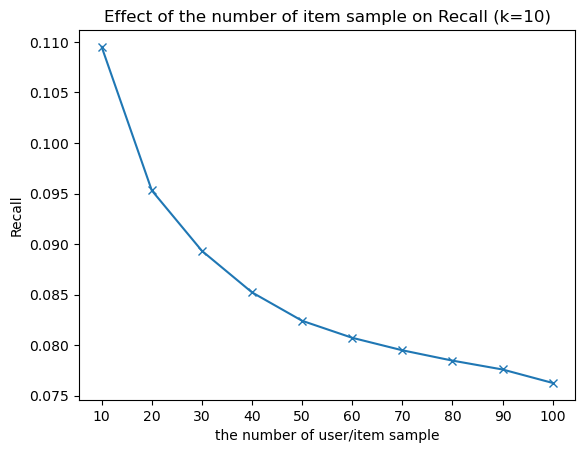

In [7]:
plt.plot(n_both_samples, re_1_1, marker='x')
plt.title('Effect of the number of item sample on Recall (k=10)')
plt.xlabel('the number of user/item sample')
plt.ylabel('Recall')
#plt.ylim(0.45, 0.55)
plt.xticks(n_both_samples)
#plt.yticks(np.arange(0.45, 0.55, 0.005))
plt.show()

In [8]:
n_both_samples = [100, 200, 300, 400, 500, 600, 700, 800, 900]

re_1_2 = []
for n_sample in n_both_samples:
    print(f'n_item_sample={n_sample}')
    print(f'n_user_sample={n_sample}')
    model = models.MutualProximityCML(
        n_user, n_item, dist, n_dim,
        n_item_sample=n_sample,
        n_user_sample=n_sample
    ).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = losses.SumTripletLoss(margin=1).to(device)
    trainer = trainers.BaseTrainer(model, optimizer, criterion, sampler, no_progressbar)
    trainer.fit(n_batch, n_epoch, recall, valid_per_epoch)
    display(trainer.valid_scores)
    # k=10を追加
    re_1_2.append(trainer.valid_scores.iloc[-1, 1])

n_item_sample=100
n_user_sample=100


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.064001,0.127237,0.522504,0,NaN
0,0.020805,0.076084,0.789196,50,0.320153


n_item_sample=200
n_user_sample=200


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.063515,0.126862,0.521679,0,NaN
0,0.019133,0.072786,0.793202,50,0.319654


n_item_sample=300
n_user_sample=300


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.063390,0.126941,0.522167,0,NaN
0,0.018957,0.072429,0.794653,50,0.318275


n_item_sample=400
n_user_sample=400


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.063461,0.126657,0.522255,0,NaN
0,0.018057,0.070469,0.795370,50,0.320027


n_item_sample=500
n_user_sample=500


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.063248,0.126742,0.521965,0,NaN
0,0.018218,0.070810,0.796259,50,0.31857


n_item_sample=600
n_user_sample=600


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.063490,0.127142,0.522499,0,NaN
0,0.017906,0.069556,0.796612,50,0.322055


n_item_sample=700
n_user_sample=700


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.063033,0.126390,0.522808,0,NaN
0,0.017253,0.069254,0.796866,50,0.321278


n_item_sample=800
n_user_sample=800


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.062631,0.126301,0.522117,0,NaN
0,0.017069,0.068302,0.796172,50,0.321904


n_item_sample=900
n_user_sample=900


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.063397,0.126880,0.522740,0,NaN
0,0.016986,0.068833,0.796626,50,0.321115


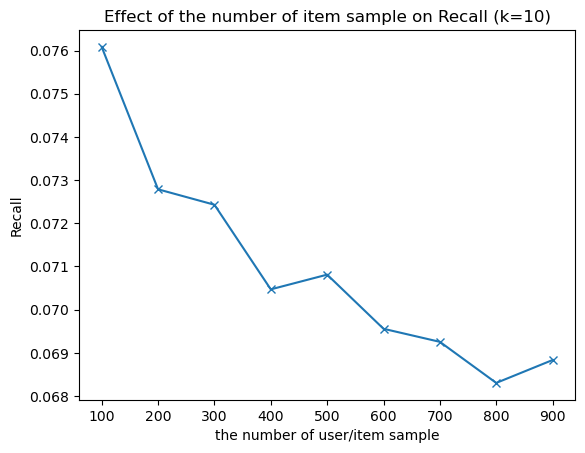

In [9]:
plt.plot(n_both_samples, re_1_2, marker='x')
plt.title('Effect of the number of item sample on Recall (k=10)')
plt.xlabel('the number of user/item sample')
plt.ylabel('Recall')
# plt.ylim(0.45, 0.55)
plt.xticks(n_both_samples)
# plt.yticks(np.arange(0.45, 0.55, 0.005))
plt.show()

In [10]:
n_both_samples = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]

re_1_3 = []
for n_sample in n_both_samples:
    print(f'n_item_sample={n_sample}')
    print(f'n_user_sample={n_sample}')
    model = models.MutualProximityCML(
        n_user, n_item, dist, n_dim,
        n_item_sample=n_sample,
        n_user_sample=n_sample
    ).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = losses.SumTripletLoss(margin=1).to(device)
    trainer = trainers.BaseTrainer(model, optimizer, criterion, sampler, no_progressbar)
    trainer.fit(n_batch, n_epoch, recall, valid_per_epoch)
    display(trainer.valid_scores)
    # k=10を追加
    re_1_3.append(trainer.valid_scores.iloc[-1, 1])

n_item_sample=1000
n_user_sample=1000


KeyboardInterrupt: 

In [ ]:
plt.plot(n_both_samples, re_1_2, marker='x')
plt.title('Effect of the number of item sample on Recall (k=10)')
plt.xlabel('the number of user/item sample')
plt.ylabel('Recall')
# plt.ylim(0.45, 0.55)
plt.xticks(n_both_samples)
# plt.yticks(np.arange(0.45, 0.55, 0.005))
plt.show()

# The number of item sample
The number of sampling to computing parameters of the distribution of distances from a specific user to all items. 

In [ ]:
# n_item_samples = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# n_user_sample = 100

# re3 = []
# for n_item_sample in n_item_samples:
#     print(f'n_item_sample={n_item_sample}')
#     print(f'n_user_sample={n_user_sample}')
#     model = models.MutualProximityCML(
#         n_user, n_item, dist, n_dim,
#         n_item_sample=n_item_sample,
#         n_user_sample=n_user_sample
#     ).to(device)
#     optimizer = optim.Adam(model.parameters(), lr=lr)
#     criterion = losses.SumTripletLoss(margin=1).to(device)
#     trainer = trainers.BaseTrainer(model, optimizer, criterion, sampler, no_progressbar)
#     trainer.fit(n_batch, n_epoch, recall, valid_per_epoch)
#     display(trainer.valid_scores)
#     # k=10を追加
#     re3.append(trainer.valid_scores.iloc[-1, 1])

In [ ]:
# plt.plot(n_item_samples, re3, marker='x')
# plt.title('Effect of the number of item sample on Recall (k=10)')
# plt.xlabel('the number of item sample')
# plt.ylabel('Recall')
# plt.ylim(0.45, 0.55)
# plt.xticks(n_item_samples)
# plt.yticks(np.arange(0.45, 0.55, 0.005))
# plt.show()

# The number of user sample
The number of sampling to computing parameters of the distribution of distances from a specific item to all users.

In [ ]:
# n_item_sample = 100
# n_user_samples = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# re4 = []
# for n_user_sample in n_user_samples:
#     print(f'n_item_sample={n_item_sample}')
#     print(f'n_user_sample={n_user_sample}')
#     model = models.MutualProximityCML(
#         n_user, n_item, dist, n_dim,
#         n_item_sample=n_item_sample,
#         n_user_sample=n_user_sample
#     ).to(device)
#     optimizer = optim.Adam(model.parameters(), lr=lr)
#     criterion = losses.SumTripletLoss(margin=1).to(device)
#     trainer = trainers.BaseTrainer(model, optimizer, criterion, sampler, no_progressbar)
#     trainer.fit(n_batch, n_epoch, recall, valid_per_epoch)
#     display(trainer.valid_scores)
#     # k=10を追加
#     re4.append(trainer.valid_scores.iloc[-1, 1])

In [ ]:
# plt.plot(n_user_samples, re4, marker='x')
# plt.title('Effect of the number of user sample on Recall (k=10)')
# plt.xlabel('the number of user sample')
# plt.ylabel('Recall')
# plt.ylim(0.45, 0.55)
# plt.xticks(n_user_samples)
# plt.yticks(np.arange(0.45, 0.55, 0.005))
# plt.show()